In [1]:
# Evitar warnings
import warnings
warnings.filterwarnings('ignore')

# Librerías
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Una semilla para reproducibilidad en los experimentos
seed = 25
np.random.seed(seed)

# Evitamos la notación científica y rendondeamos los valores a 2 dígitos después de la coma
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
# Cargamos los datos
url = 'https://github.com/jorge-robledo11/Datasets/blob/main/Datasets/celerix/Base%20PRUEBA%20-%20ANALITICA.xlsx?raw=true'
dataset = pd.read_excel(url)

# Estructura del dataset
dataset.head()

,SOLICITUD,FECHA_INICIO,MULTAS_SIMIT,EDAD,CUOTA_INICIAL,GENERO,ESTADO_CIVIL,NIVEL_ESTUDIO,TIPO_VIVIENDA,PERSONAS_CARGO,...,TIPO_CLIENTE,HABITO_PAGO,ENDEUDAMIENTO,CALIFICACION,CREDITOS_VIGENTES,Puntaje Riesgo,TIPO_CONTRATO,ANTIGUEDAD,Marca producto,Estado
0,1,2017-01-02,0.00,29,0,F,Divorciado,Tecnólogico,Arrendada,2,...,Independiente sin Establecimiento,B,"85,860.00",A,2,2190,Indefinido,10,Marca A,Aprobada
1,2,2017-01-02,0.00,60,1035000,F,Soltero,Tecnólogico,Arrendada,1,...,Independiente sin Establecimiento,E,"1,270,940.00",C,9,2142,Por Obra o Labor,131,Marca A,Desistida
2,3,2017-01-02,0.00,61,472500,M,Divorciado,Tecnólogico,Arrendada,1,...,Independiente sin Establecimiento,E,"664,620.00",C,7,2073,Indefinido,63,Marca B,Anulada
3,4,2017-01-02,0.00,25,0,M,Casado,Tecnólogico,Arrendada,2,...,Independiente sin Establecimiento,B,"51,940.00",A,2,1929,Otra,12,Marca A,Negada
4,5,2017-01-02,0.00,30,3672000,F,Divorciado,Tecnólogico,Arrendada,3,...,Independiente sin Establecimiento,B,0.00,A,2,3,INDEPENDIENTE SIN ESTABLECIMIENTO,131,Marca A,Anulada


In [3]:
# Dimensiones
print('\t\tDataset')
print(f'Filas: {dataset.shape[0]}')
print(f'Columnas: {dataset.shape[1]}')

		Dataset
Filas: 33668
Columnas: 27


In [4]:
# Función para reducir el peso en memoria de un DataFrame
def downcast_dtypes(data:DataFrame) -> DataFrame:

    """
    Function to downcast any type variable

    Args:
        dataframe: DataFrame
    Returns
        DataFrame: Downcasted DataFrame
    """

    start = data.memory_usage(deep=True).sum() / 1024 ** 2
    float_cols = [col for col in data if data[col].dtype == 'float64']
    int_cols = [col for col in data if data[col].dtype in ['int64', 'int32']]
    object_cols = [col for col in data if data[col].dtype in ['object', 'bool']]

    data[float_cols] = data[float_cols].astype(np.float32)
    data[int_cols] = data[int_cols].astype(np.int16)
    data[object_cols] = data[object_cols].astype('category')

    end = data.memory_usage(deep=True).sum() / 1024 ** 2
    saved = (start - end) / start * 100
    print(f'Memory Saved: {saved:0.2f}%', '\n')
    data.info()

    return data 


dataset = downcast_dtypes(dataset)

Memory Saved: 94.20% 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33668 entries, 0 to 33667
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   SOLICITUD          33668 non-null  int16         
 1   FECHA_INICIO       33668 non-null  datetime64[ns]
 2   MULTAS_SIMIT       33668 non-null  float32       
 3   EDAD               33668 non-null  int16         
 4   CUOTA_INICIAL      33668 non-null  int16         
 5   GENERO             33668 non-null  category      
 6   ESTADO_CIVIL       33668 non-null  category      
 7   NIVEL_ESTUDIO      33668 non-null  category      
 8   TIPO_VIVIENDA      33668 non-null  category      
 9   PERSONAS_CARGO     33668 non-null  int16         
 10  ZONA               33668 non-null  category      
 11  PLAZO              33668 non-null  int16         
 12  CODEUDOR           33668 non-null  category      
 13  VALOR_SOLICITADO   33668 non-null  flo

In [5]:
# Homogenizamos los nombres de los predictores
dataset.rename(columns=str.lower, inplace=True)

# Creamos una copia del dataset origignal
data = dataset.copy()

# Dropeamos las variables innecesarias en nuestro pandas dataframe
data = data.drop(['solicitud', 'estado'], axis=1)
data.head()

,fecha_inicio,multas_simit,edad,cuota_inicial,genero,estado_civil,nivel_estudio,tipo_vivienda,personas_cargo,zona,...,subtipo_cliente,tipo_cliente,habito_pago,endeudamiento,calificacion,creditos_vigentes,puntaje riesgo,tipo_contrato,antiguedad,marca producto
0,2017-01-02,0.00,29,0,F,Divorciado,Tecnólogico,Arrendada,2,ZONA BOGOTA,...,INFO,Independiente sin Establecimiento,B,"85,860.00",A,2,2190,Indefinido,10,Marca A
1,2017-01-02,0.00,60,-13576,F,Soltero,Tecnólogico,Arrendada,1,ZONA SUROCCIDENTE,...,INFO,Independiente sin Establecimiento,E,"1,270,940.00",C,9,2142,Por Obra o Labor,131,Marca A
2,2017-01-02,0.00,61,13748,M,Divorciado,Tecnólogico,Arrendada,1,ZONA CENTRO,...,INFO,Independiente sin Establecimiento,E,"664,620.00",C,7,2073,Indefinido,63,Marca B
3,2017-01-02,0.00,25,0,M,Casado,Tecnólogico,Arrendada,2,ZONA COSTA,...,INFO,Independiente sin Establecimiento,B,"51,940.00",A,2,1929,Otra,12,Marca A
4,2017-01-02,0.00,30,1984,F,Divorciado,Tecnólogico,Arrendada,3,ZONA SUROCCIDENTE,...,FORM,Independiente sin Establecimiento,B,0.00,A,2,3,INDEPENDIENTE SIN ESTABLECIMIENTO,131,Marca A


In [6]:
# Resumen estadístico
data.describe()

,multas_simit,edad,cuota_inicial,personas_cargo,plazo,valor_solicitado,ingresos,egresos,endeudamiento,creditos_vigentes,puntaje riesgo,antiguedad
count,"33,668.00","33,668.00","33,668.00","33,668.00","33,668.00","33,668.00","33,668.00","33,668.00","33,668.00","33,668.00","33,668.00","33,668.00"
mean,"76,472.34",34.10,-645.57,2.04,36.40,"4,833,895.00","1,768,666.00","711,926.56","376,430.69",2.42,"1,379.84",39.08
std,"300,711.41",16.25,"17,410.52",1.01,8.51,"1,473,938.12","2,215,846.00","1,360,023.50","1,624,263.38",2.57,907.21,55.65
min,0.00,-1.00,"-32,764.00",1.00,6.00,"525,000.00",0.00,0.00,"-255,460.00",0.00,0.00,0.00
25%,0.00,26.00,"-12,770.00",1.00,36.00,"3,726,450.00","1,041,600.00","339,000.00",0.00,1.00,21.00,8.00
50%,0.00,31.00,0.00,2.00,36.00,"4,608,450.00","1,344,000.00","565,000.00","104,940.00",2.00,"1,803.00",19.00
75%,0.00,39.00,"11,212.00",3.00,36.00,"5,782,875.00","1,792,000.00","768,400.00","349,800.00",3.00,"2,139.00",43.00
max,"6,679,191.50","2,000.00","32,748.00",29.00,60.00,"13,639,500.00","156,352,000.00","85,541,000.00","142,500,032.00",89.00,"2,742.00",637.00


---

### **Caso de Estudio**
##### La empresa crediticia XYZ lo contrata a usted para entender por medio del análisis de una base de datos los siguientes puntos fundamentales para la Planeación Estratégica de la empresa:

##### 1. ¿Suponiendo que los clientes que están llegando a solicitar crédito son el cliente objetivo de la empresa, cuál es ese cliente objetivo de la empresa? – Identifique variables sociodemográficas y de comportamiento de crédito.
##### 2. ¿Hay una diferencia en el tipo de clientes que solicitaron el crédito en algunos períodos del año específicos?
##### 3. ¿Se logra identificar un perfil de cliente en los que terminan con el crédito aprobado?
##### 4. La variable estado, puede tener estados finales: anulado, desistido, negado o aprobado, o las solicitudes que están en proceso. El objetivo es, a partir de los estados finales, entender cuáles clientes tienen una mayor probabilidad de desistimiento. ¿Qué método podría usar para predecir cual cliente va a desistir en el proceso?

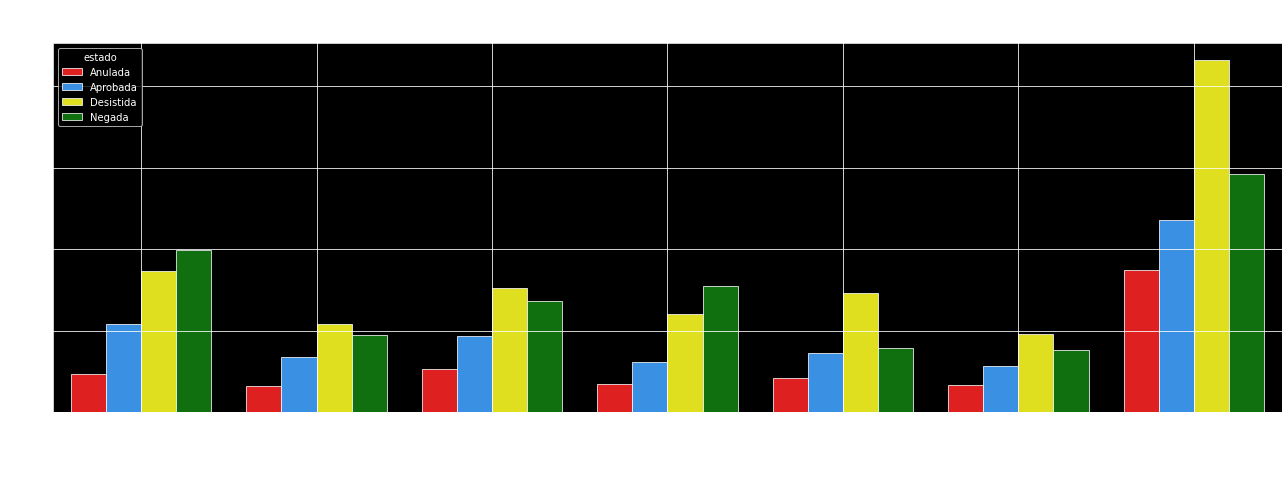

In [7]:
# Countplot
plt.figure(figsize=(18, 7))
plt.style.use('dark_background')
plt.title('Distribución de zonas con respecto al comportamiento del crédito otorgado\n', fontsize=16)
sns.countplot(x='zona', hue='estado', data=dataset, palette=['red', 'dodgerblue', 'yellow', 'green'], edgecolor='white', lw=0.75)
plt.xticks(fontsize=10, rotation=25)
plt.yticks(fontsize=10)
plt.grid()
plt.tight_layout()

* ##### Los principales clientes a los que deberían considerarse como objetivo son a todos los que desisten en todas las zonas. Se cumple un patrón en común en todas las zonas y es que la etiqueta que **desisten** es el estado dominante a excepción de las zonas de **Antioquia** y **Costa**.
* ##### Para el caso de los créditos **aprobados** el comportamiento es muy parecido al de los que **desisten** en las diferentes zonas.

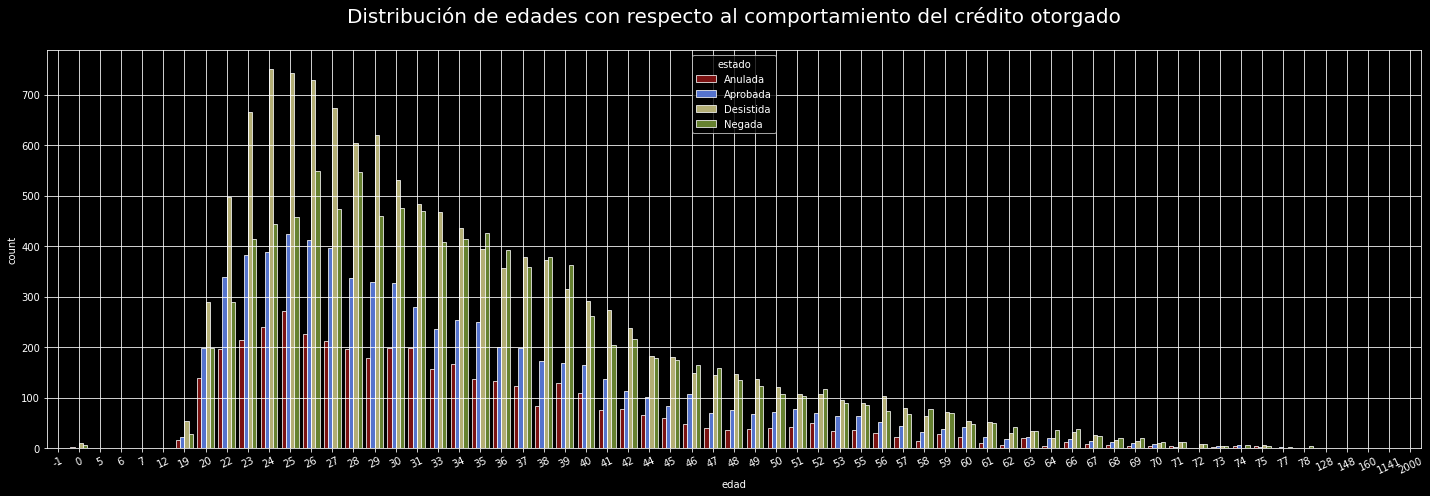

In [8]:
# Countplot
plt.figure(figsize=(20, 7))
plt.style.use('dark_background')
plt.title('Distribución de edades con respecto al comportamiento del crédito otorgado\n' , fontsize=20)
sns.countplot(x='edad', hue='estado', data=dataset, palette=['darkred', 'royalblue', 'darkkhaki', 'olivedrab'], edgecolor='white', lw=0.75)
plt.xticks(fontsize=10, rotation=25)
plt.yticks(fontsize=10)
plt.grid()
plt.tight_layout()

* ##### De acuerdo a la distribución de edades los que debería considerarse como objetivo serían aquellas personas en el rango de edad entre los 20 y los 42 años que es donde se concentran las personas que **desisten** de los créditos.
* ##### Para las personas que les son **aprobados** sus créditos, la tendencia es muy similar a la de **desistimiento**, la concentración se da en el rango de los 20 y 45 años.

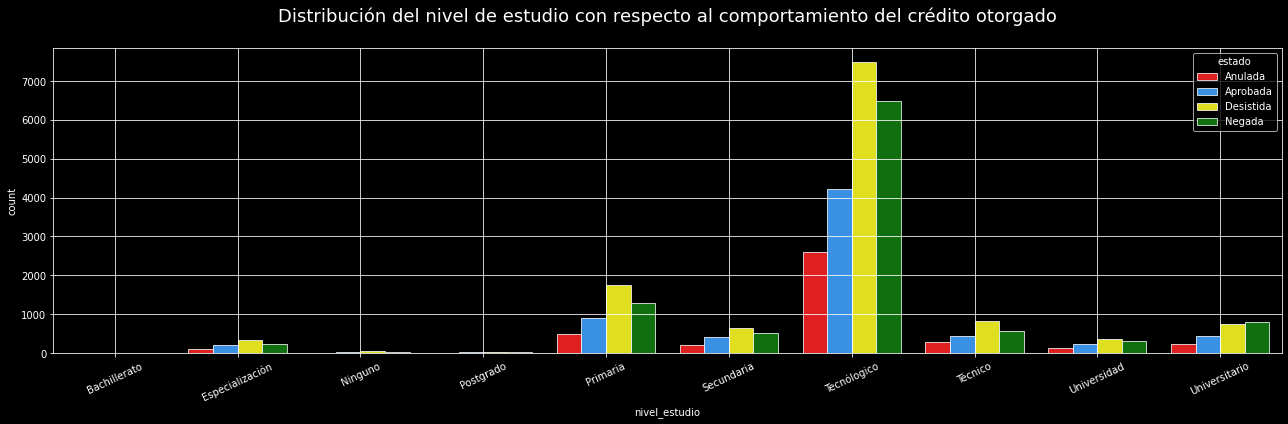

In [9]:
# Countplot
plt.figure(figsize=(18, 6))
plt.style.use('dark_background')
plt.title('Distribución del nivel de estudio con respecto al comportamiento del crédito otorgado\n', fontsize=18)
sns.countplot(x='nivel_estudio', hue='estado', data=dataset, palette=['red', 'dodgerblue', 'yellow', 'green'], edgecolor='white', lw=0.75)
plt.xticks(fontsize=10, rotation=25)
plt.yticks(fontsize=10)
plt.grid()
plt.tight_layout()

* ##### De acuerdo al **nivel estudio** podemos observar que las personas a medida que su nivel académico es más alto tiende a no interesarle los créditos, probablemente debido a su nivel de ingreso es más alto, puede consumir más bienes y servicios de contado.
* ##### Se sigue observando un patrón la etiqueta de **desistimiento** es la dominante con respecto a las otras etiquetas en la mayoría de casos.
* ##### Para el caso de los créditos **aprobados** el comportamiento es muy parecido al de los que **desisten** en los diferentes niveles de estudio.

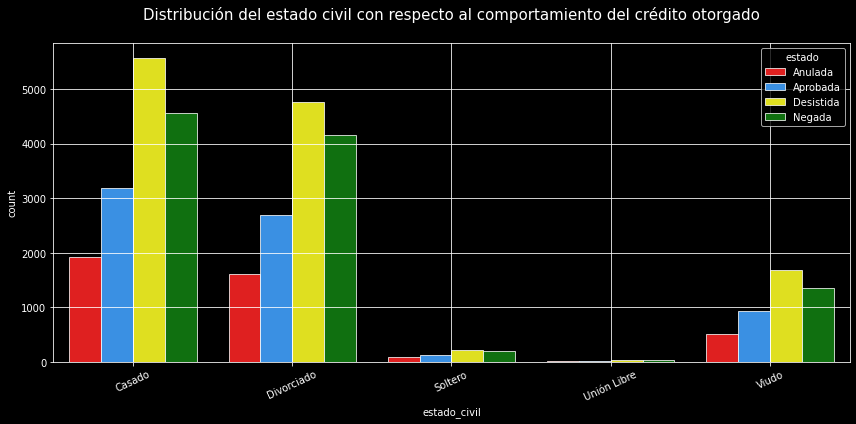

In [10]:
# Countplot
plt.figure(figsize=(12, 6))
plt.style.use('dark_background')
plt.title('Distribución del estado civil con respecto al comportamiento del crédito otorgado\n' , fontsize=15)
sns.countplot(x='estado_civil', hue='estado', data=dataset, palette=['red', 'dodgerblue', 'yellow', 'green'], edgecolor='white', lw=0.75)
plt.xticks(fontsize=10, rotation=25)
plt.yticks(fontsize=10)
plt.grid()
plt.tight_layout()

* ##### Basado en el gráfico, de acuerdo al estado civil de las personas es un poco atípico que hayan mayor cantidades a personas **viudas** que personas **solteras** en los datos.
* ##### Se sigue observando la tendencia de que la etiqueta dominante es la de desistimiento.
* ##### Para el caso de los créditos **aprobados** el comportamiento es muy parecido al de los que **desisten** en el estado civil de las personas.

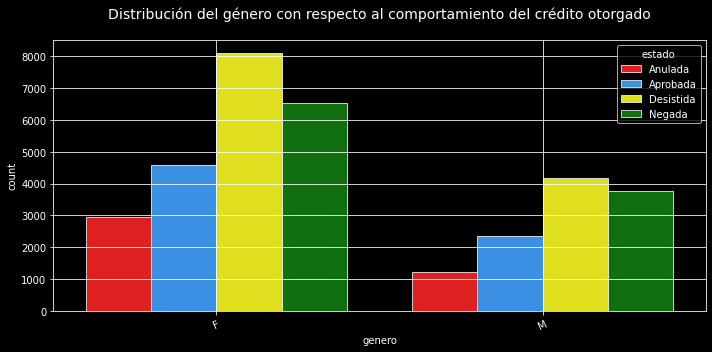

In [11]:
# Countplot
plt.figure(figsize=(10, 5))
plt.style.use('dark_background')
plt.title('Distribución del género con respecto al comportamiento del crédito otorgado\n' , fontsize=14)
sns.countplot(x='genero', hue='estado', data=dataset, palette=['red', 'dodgerblue', 'yellow', 'green'], edgecolor='white', lw=0.75)
plt.xticks(fontsize=10, rotation=25)
plt.yticks(fontsize=10)
plt.grid()
plt.tight_layout()

* ##### De acuerdo a la distribución del **género** podemos notar que las que más acceden a los créditos son las mujeres, probablemente debido a actitudes relacionadas con el emprendimiento a diferencia que con los hombres.
* ##### Se sigue observando la tendencia de que la etiqueta dominante es la de desistimiento.

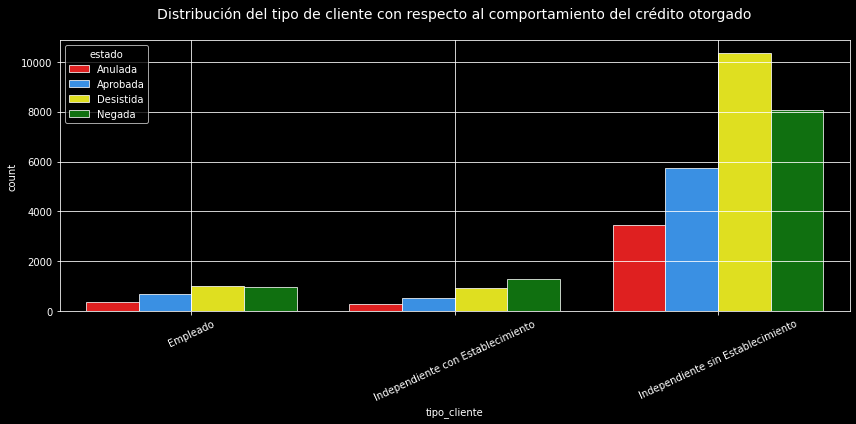

In [12]:
# Countplot
plt.figure(figsize=(12, 6))
plt.style.use('dark_background')
plt.title('Distribución del tipo de cliente con respecto al comportamiento del crédito otorgado\n', fontsize=14)
sns.countplot(x='tipo_cliente', hue='estado', data=dataset, palette=['red', 'dodgerblue', 'yellow', 'green'], edgecolor='white', lw=0.75)
plt.xticks(fontsize=10, rotation=25)
plt.yticks(fontsize=10)
plt.grid()
plt.tight_layout()

* ##### Podemos notar que las personas que más le interesan en acceder a créditos de acuerdo a los datos son las personas **independientes sin establecimiento**, ya que probablemente buscan hacer crecer su pequeño negocio o empredimiento.
* ##### Se sigue observando la tendencia de que la etiqueta dominante es la de **desistimiento**.
* ##### Para el caso de los créditos **aprobados** el comportamiento es muy parecido al de los que **desisten** en los tipos de clientes.

In [13]:
# Extraemos los meses de las fechas y los mapeamos por el nombre de cada mes
meses = dataset['fecha_inicio'].dt.month
meses = meses.map({
        1: 'Enero', 
        2: 'Febrero',
        3: 'Marzo',
        4: 'Abril',
        5: 'Mayo',
        6: 'Junio',
        7: 'Julio',
        8: 'Agosto',
        9: 'Septiembre',
        10: 'Octubre',
        11: 'Noviembre',
        12: 'Diciembre'
})
meses = pd.DataFrame(meses)

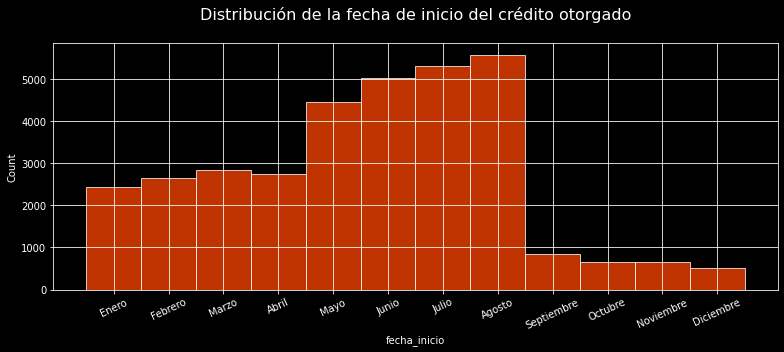

In [14]:
# Histplot
plt.figure(figsize=(11, 5))
plt.style.use('dark_background')
plt.title('Distribución de la fecha de inicio del crédito otorgado\n' , fontsize=16)
sns.histplot(x='fecha_inicio', data=meses, color='orangered', edgecolor='white', lw=0.75, bins=50)
plt.xticks(fontsize=10, rotation=25)
plt.yticks(fontsize=10)
plt.grid()
plt.tight_layout()

* Podemos observar un patrón interesante en la información, si tomamos los años y los dividimos en *cuatrimestres*:
    - En el primer cuatrimestre comprendido entre los meses de Enero a Abril la solicitud de créditos es medianamente alta.
    - En el segundo cuatrimestre comprendido entre los meses de Mayo a Agosto se disparan las solicitudes de créditos alcanzando los picos más altos.
    - En el tercer cuatrimestre comprendido entre los meses de Septiembre a Diciembre la solicitud de créditos es realmente baja comparada con los dos cuatrimestres anteriores.

### **Capturamos los tipos de variables**

In [15]:
# Función para capturar los tipos de variables
def capture_variables(data:DataFrame) -> tuple:
    
    """
    Function to capture the types of Dataframe variables

    Args:
        dataframe: DataFrame
    Returns
        variables: A tuple of lists
    
    The order to unpack variables:
    1. numericals
    2. categoricals
    3. temporary
    4. discretes
    5. continous
    """

    numericals = list(data.select_dtypes(include = [np.int16, np.float32]).columns)
    categoricals = list(data.select_dtypes(include = ['category', 'bool']).columns)
    temporary = list(data.select_dtypes(include = ['datetime', 'timedelta']).columns)
    discretes = [col for col in data[numericals] if len(data[numericals][col].unique()) < 20]
    continuous = [col for col in data[numericals] if col not in discretes]

    # Variables
    print('\t\tTipos de variables')
    print(f'Hay {len(continuous)} variables continuas')
    print(f'Hay {len(discretes)} variables discretas')
    print(f'Hay {len(temporary)} variables temporales')
    print(f'Hay {len(categoricals)} variables categóricas')

    variables = tuple((numericals, categoricals, temporary, discretes, continuous))
    
    # Retornamos una tupla de listas
    return variables


variables = capture_variables(data=data)

# Unpacking
numericals, categoricals, temporary, discretes, continuous = variables

		Tipos de variables
Hay 10 variables continuas
Hay 2 variables discretas
Hay 1 variables temporales
Hay 12 variables categóricas


In [17]:
# Extraemos el mes de las fechas
data['fecha_inicio'] = data['fecha_inicio'].dt.month

# Downcasting y capturamos variables otra vez
data = downcast_dtypes(data)
variables = capture_variables(data=data)

# Unpacking
numericals, categoricals, _, discretes, continuous = variables

Memory Saved: 11.07% 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33668 entries, 0 to 33667
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   fecha_inicio       33668 non-null  int16   
 1   multas_simit       33668 non-null  float32 
 2   edad               33668 non-null  int16   
 3   cuota_inicial      33668 non-null  int16   
 4   genero             33668 non-null  category
 5   estado_civil       33668 non-null  category
 6   nivel_estudio      33668 non-null  category
 7   tipo_vivienda      33668 non-null  category
 8   personas_cargo     33668 non-null  int16   
 9   zona               33668 non-null  category
 10  plazo              33668 non-null  int16   
 11  codeudor           33668 non-null  category
 12  valor_solicitado   33668 non-null  float32 
 13  ingresos           33668 non-null  float32 
 14  egresos            33668 non-null  float32 
 15  subtipo_cliente    33668 non-n

### **Valores faltantes**

In [18]:
# Función para observar variables con datos nulos y su porcentaje
def nan_values(data:DataFrame, variables:list, variable_type:str):
    """
    Function to observe variables with nan values and their percentages

    Args:
        data: DataFrame
        variables: list
        variable_type: str
    Returns:
        print: Variables that meet this condition
    """
    print('Variables ' + variable_type)

    for var in variables:
        if data[var].isnull().sum() > 0:
            print(f'{var}: {data[var].isnull().mean()*100:0.2f}%')


# Valores faltantes
nan_values(data=data, variables=continuous, variable_type='continuas\n')
nan_values(data=data, variables=discretes, variable_type='discretas\n')
nan_values(data=data, variables=categoricals, variable_type='categóricas')

Variables continuas

Variables discretas

Variables categóricas
tipo_contrato: 1.12%


In [19]:
# Variables Categóricas
# Capturemos las variables con menor porcentaje de datos faltantes (menos del 5%)
categoricals_less_than_5perc = [var for var in categoricals if data[var].isnull().sum() > 0 and data[var].isnull().mean() <= 0.05]
print(f'Variables categóricas por debajo del 5% de datos faltantes:\n{categoricals_less_than_5perc}\n')

Variables categóricas por debajo del 5% de datos faltantes:
['tipo_contrato']



		Distribución de clases
Desistida: 36.43%
Negada: 30.62%
Aprobada: 20.61%
Anulada: 12.34%


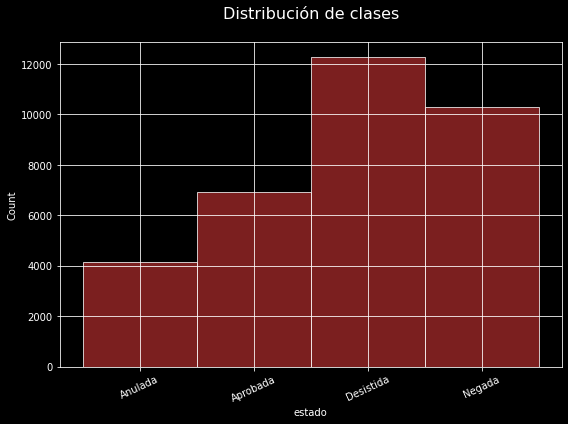

In [20]:
# Función para obtener la estratificación de clases/target
def get_estratified_classes(data:DataFrame, target:str) -> any:

    """
    Function to get estratified by classes

    Args:
        data: DataFrame
        target: str
    Returns:
        tmp: print
    """

    tmp = (data.groupby(target).size().sort_values(ascending=False))/len(data)
    tmp = dict(tmp)
    
    print('\t\tDistribución de clases')
    for key, value in tmp.items():
        print(f'{key}: {value*100:0.2f}%')

    
    # Histplot
    plt.figure(figsize=(8, 6))
    plt.style.use('dark_background')
    plt.title('Distribución de clases\n' , fontsize=16)
    sns.histplot(x=target, data=data, color='brown', edgecolor='white', lw=0.75, binwidth=1)
    plt.xticks(fontsize=10, rotation=25)
    plt.yticks(fontsize=10)
    plt.grid()
    plt.tight_layout()


# Estratificar las clases
get_estratified_classes(data=dataset, target='estado')

In [21]:
# Función para obtener la asimetría de los predictores
def get_skew(data:DataFrame) -> any:

    """
    Function to get skew by classes

    Args:
        data: DataFrame
    Returns:
        print
    """

    tmp = data.skew().sort_values(ascending=False)
    tmp = dict(tmp)
    
    print('\t\tAsimetría entre predictores')
    for key, value in tmp.items():
        print(f'{key}: {value:0.2f}')


# Obtener el sesgo de los predictores numéricos
get_skew(data=data[numericals])

		Asimetría entre predictores
edad: 62.28
endeudamiento: 37.80
egresos: 26.12
ingresos: 21.13
multas_simit: 5.64
creditos_vigentes: 3.80
personas_cargo: 3.38
antiguedad: 3.20
valor_solicitado: 0.65
cuota_inicial: 0.12
fecha_inicio: -0.02
puntaje riesgo: -0.57
plazo: -0.62


### **Correlaciones**

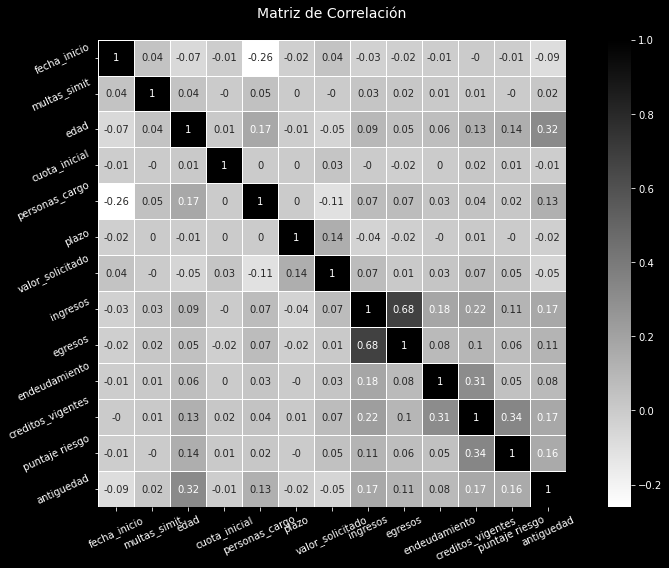

In [22]:
# Correlación entre predictores
%matplotlib inline
correlations = pd.concat((data, dataset['estado']), axis=1).corr(method='pearson').round(2)
plt.style.use('dark_background')
plt.figure(figsize=(12, 8))
sns.heatmap(correlations, vmax=1, annot=True, cmap='gist_yarg', linewidths=1, square=True)
plt.title('Matriz de Correlación\n', fontsize=14)
plt.xticks(fontsize=10, rotation=25)
plt.yticks(fontsize=10, rotation=25)
plt.tight_layout()

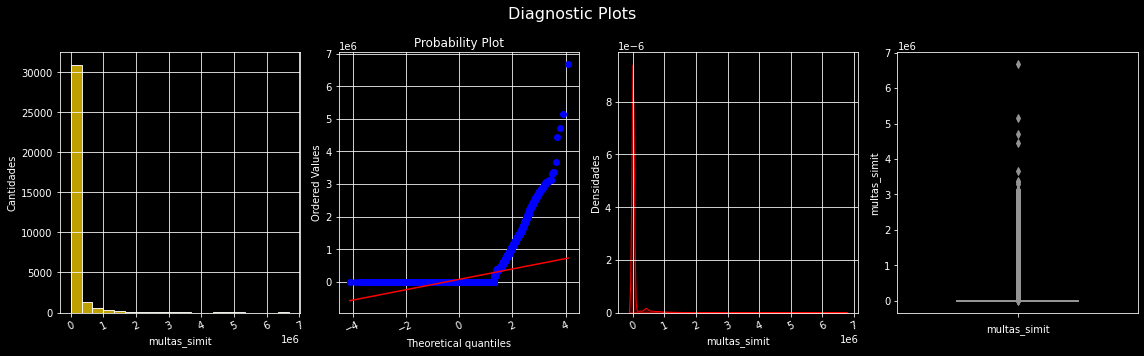

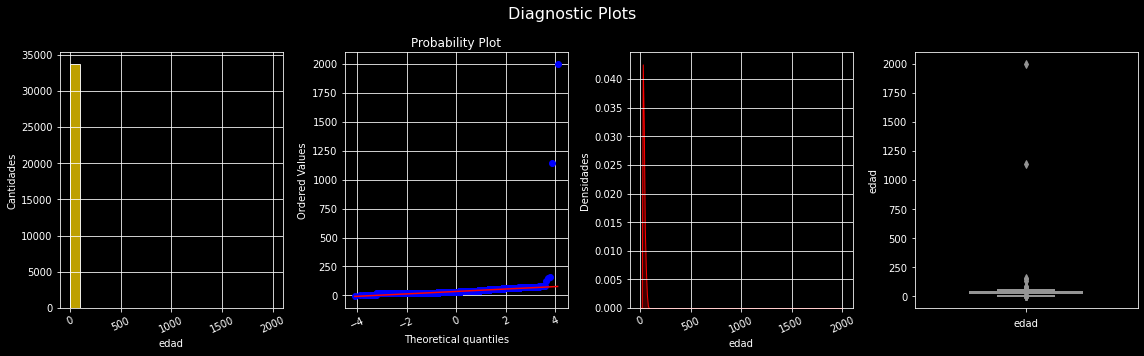

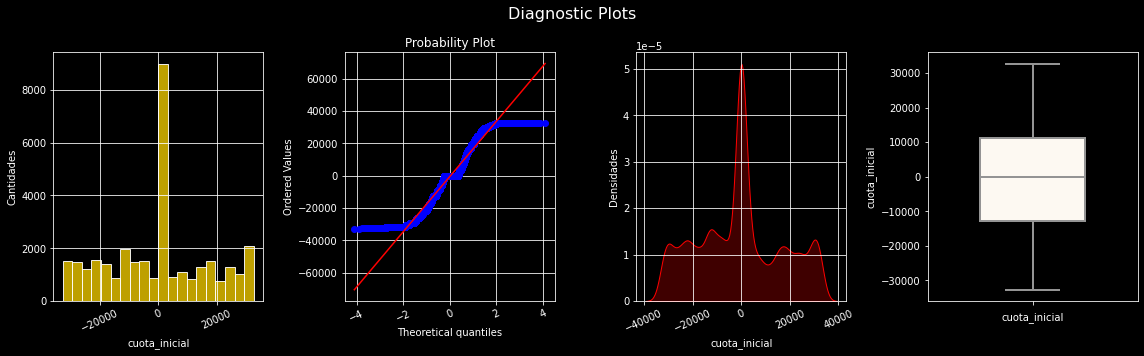

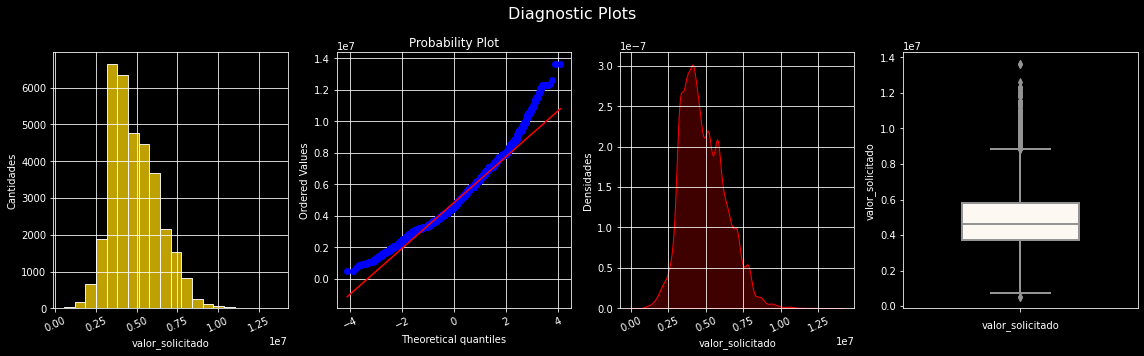

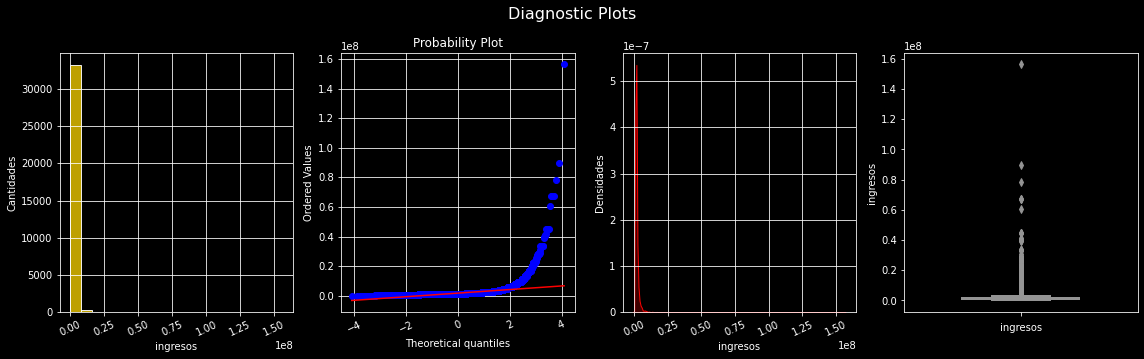

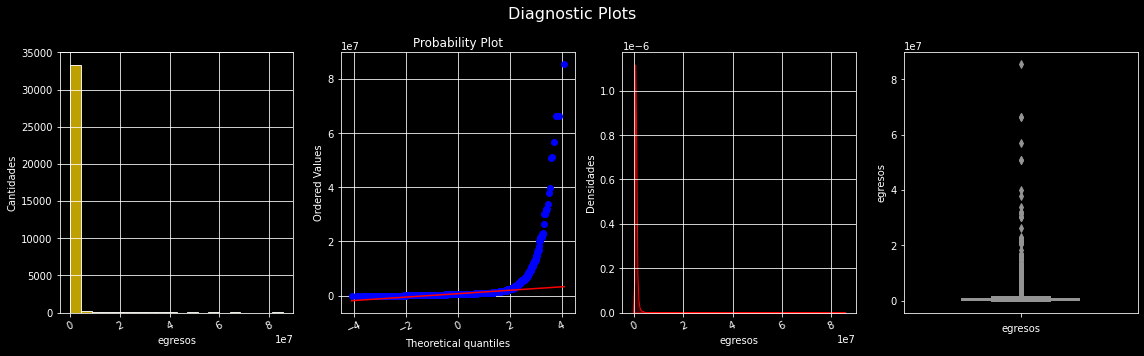

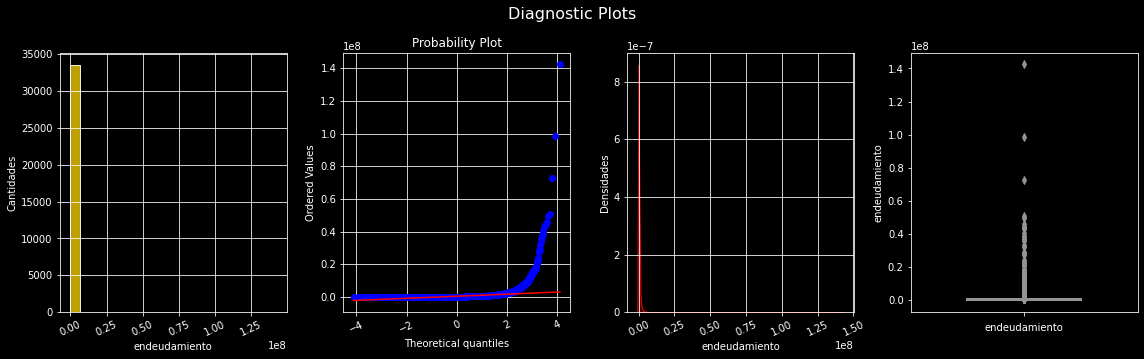

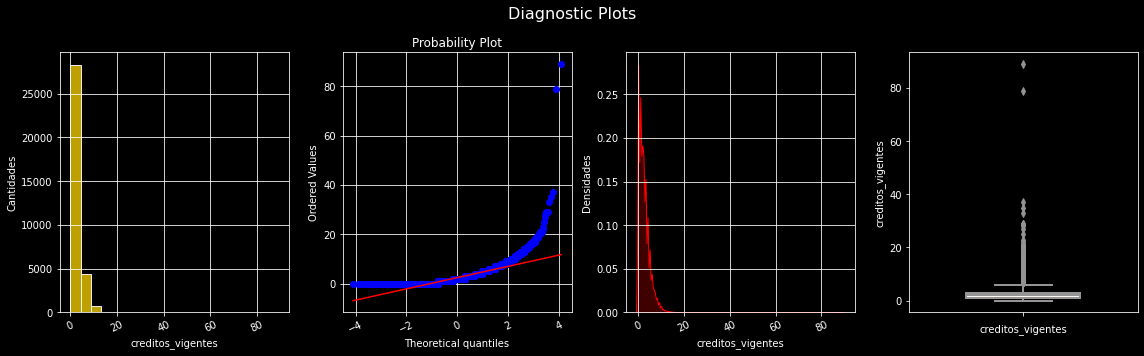

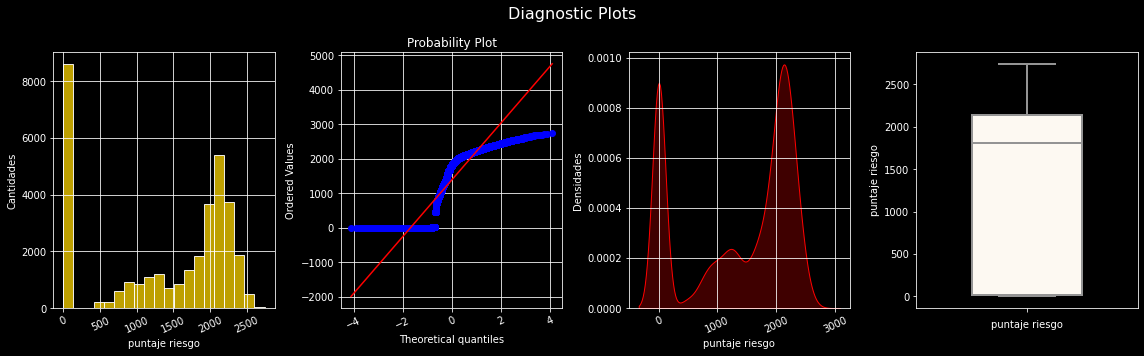

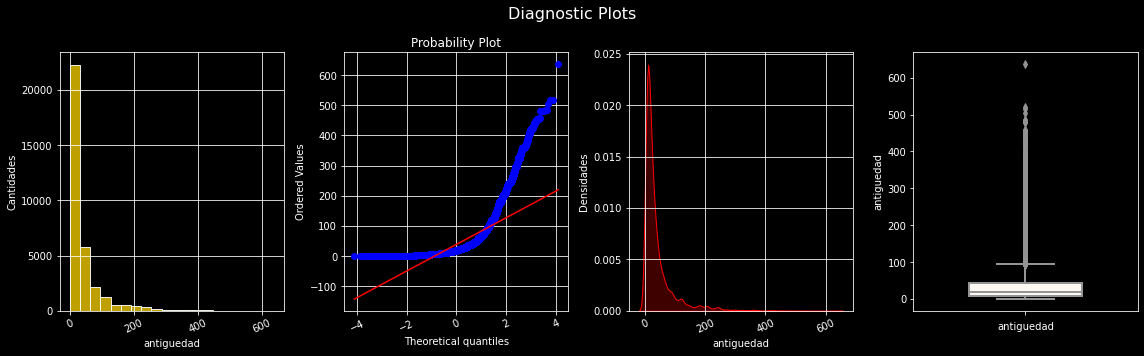

In [23]:
# Función diagnóstico para variables continuas
def diagnostic_plots(data:DataFrame, variables:list):
    
    import scipy.stats as stats

    data = data[variables]
    for var in data:
        plt.style.use('dark_background')
        fig, axes = plt.subplots(1, 4, figsize=(16, 5))
        fig.suptitle('Diagnostic Plots', fontsize=16)

        plt.subplot(1, 4, 1)
        sns.histplot(data[var], bins=20, color='gold')
        plt.ylabel('Cantidades')
        plt.xticks(rotation=25)
        plt.grid(which='major')

        plt.subplot(1, 4, 2)
        stats.probplot(data[var], dist='norm', plot=plt)
        plt.xticks(rotation=25)
        plt.grid()

        plt.subplot(1, 4, 3)
        sns.kdeplot(data[var], shade=True, color='red')
        plt.ylabel('Densidades')
        plt.xticks(rotation=25)
        plt.grid()

        plt.subplot(1, 4, 4)
        sns.boxplot(y=data[var], color='floralwhite', linewidth=2, width=0.5)

        plt.xlabel(var)
        fig.tight_layout()


# Variables continuas
diagnostic_plots(data=data, variables=continuous)

### **Outliers**

In [24]:
# Función para detectar el número de registros con outliers a 1.5 std
def get_outliers(data:DataFrame, std:float) -> list:

    """
    Returns a list of rows with outliers, 
    we define the upper and lower limit to 1.5 std
    Args:
        data: DataFrame
    Returns:
        list: outliers
    Note: At std you could use 1.5 or 3 as typical values
    """

    outliers = list()

    # Std & Mean
    data_std = data.std()
    data_mean = data.mean()

    # Cotas
    anomaly_cut_off = data_std * std
    # Inferior
    lower_limit = data_mean - anomaly_cut_off
    # Superior
    upper_limit = data_mean + anomaly_cut_off

    # Generamos los outliers
    for index, row in data.iterrows():     
        outlier = row
        if (outlier.iloc[0] > upper_limit[0]) or (outlier.iloc[0] < lower_limit[0]):
            outliers.append(index)

    return outliers

# Fijamos a 1.5 de desvación estándar de los valores con respecto a la media
outliers = get_outliers(data=data, std=1.5)
print(f'Número de registros que contienen outliers: {len(outliers)}')
print(f'Porcentaje de outliers en el dataset: {((len(outliers) / data.shape[0])*100):0.2f}%')

Número de registros que contienen outliers: 4268
Porcentaje de outliers en el dataset: 12.68%


* Como pudimos darnos cuenta tenemos una proporción grande de outliers en el dataset alrededor del 12.68%.
* Al **discretizar** podremos manejar este problema y no perder información de nuestros datos, finalmente lo que queremos es evitar introducir ruido a nuestro modelo.

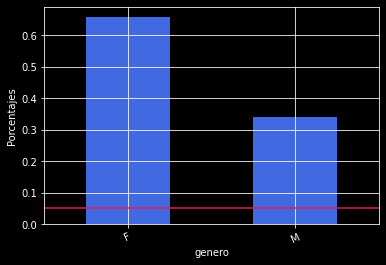

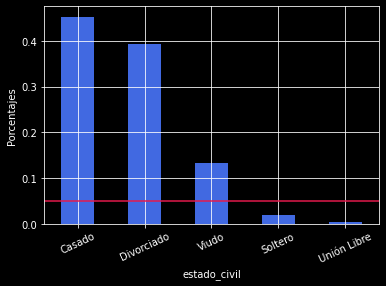

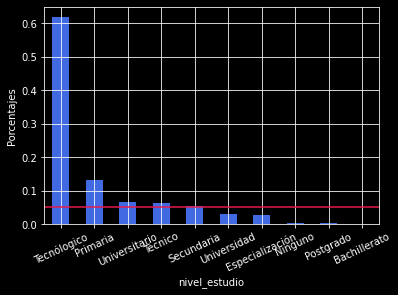

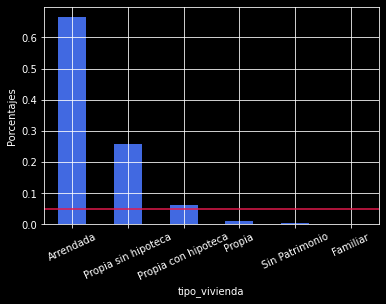

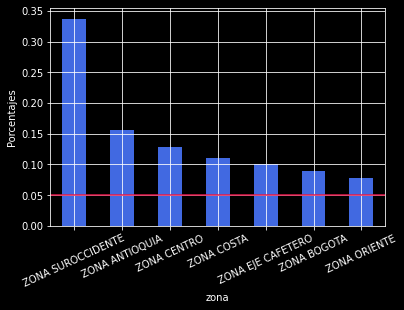

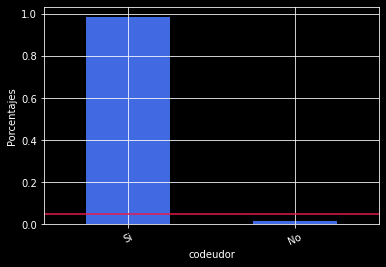

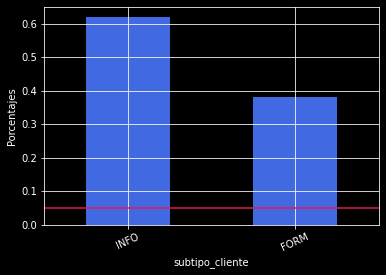

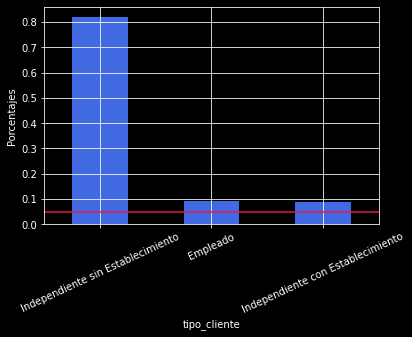

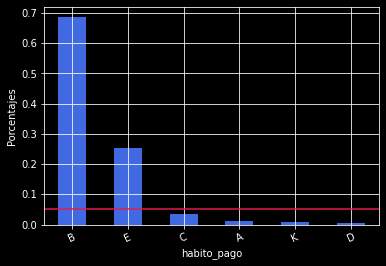

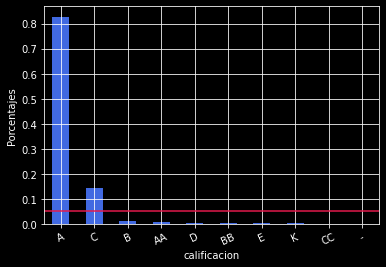

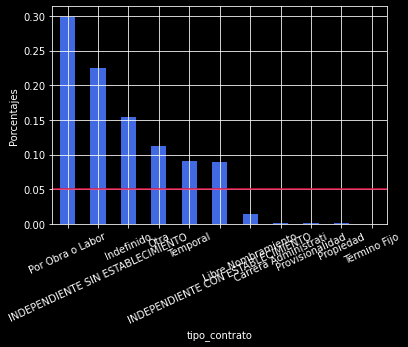

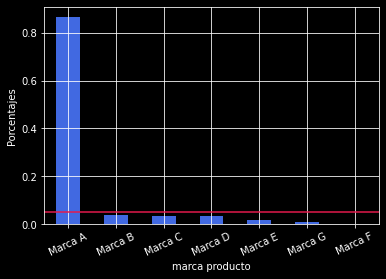

In [25]:
# Función para graficar variables categóricas poco comunes y su cardinalidad
def categoricals_plot(data:DataFrame, variables: list):

    for var in variables:
        plt.style.use('dark_background')
        temp_dataframe = pd.Series(data[var].value_counts() / len(data))

        # Graficar con los porcentajes
        fig = temp_dataframe.sort_values(ascending=False).plot.bar(color='royalblue')
        fig.set_xlabel(var)

        # Añadir una línea horizontal a 5% para resaltar categorías poco comunes
        fig.axhline(y=0.05, color='#e51a4c')
        fig.set_ylabel('Porcentajes')

        plt.xticks(rotation=25)
        plt.grid()
        plt.show()


# Etiquetas poco comunes en las variables categóricas
categoricals_plot(data=data, variables=categoricals)

* Podemos notar que en las variables categóricas como son el caso de `tipo_contrato`, `marca_producto`, `calificacion`, `nivel_estudio`, `etc`. Tienen una altísima cardinalidad y posee muchas etiquetas o categorías poco comúnes.
    - Lo mejor sería colocarlas una etiqueta poco común a las que estén por debajo del 5%.

### **Imputación**

In [26]:
print('\t\tIMPUTACIÓN\n')
print(f"""• Las variables categóricas con datos faltantes por debajo del 5% {categoricals_less_than_5perc} les agregaremos una etiqueta dedicada llamada «Missing»\n""")

		IMPUTACIÓN

• Las variables categóricas con datos faltantes por debajo del 5% ['tipo_contrato'] les agregaremos una etiqueta dedicada llamada «Missing»



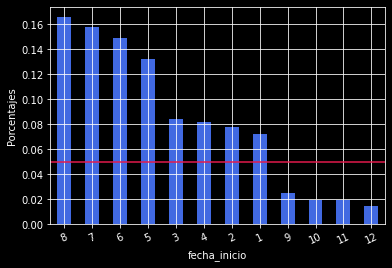

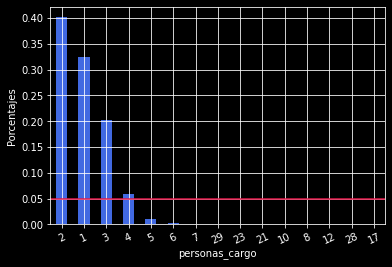

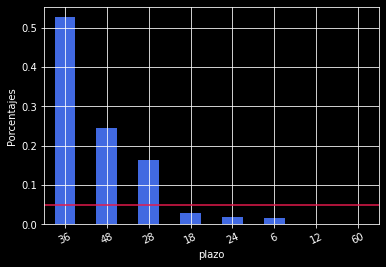

In [27]:
# Variables discretas
categoricals_plot(data=data, variables=discretes)

### **Codificación**

In [28]:
# Variables categóricas con alta cardinalidad y baja cardinalidad
# Por medio del barplot definimos 6 etiquetas en la alta cardinalidad y 7 en la baja cardinalidad de las variables categóricas
categoricals_high_cardinality = ['nivel_estudio', 'tipo_contrato', 'calificacion']
categoricals_low_cardinality = [cat for cat in categoricals if cat not in categoricals_high_cardinality]
print(f'Variables categórcias con alta cardinalidad: {categoricals_high_cardinality}') # 6 Categorías/etiquetas en el transformador
print(f'Variables categórcias con baja cardinalidad: {categoricals_low_cardinality}') # 7 Categorías/etiquetas en el transformador

Variables categórcias con alta cardinalidad: ['nivel_estudio', 'tipo_contrato', 'calificacion']
Variables categórcias con baja cardinalidad: ['genero', 'estado_civil', 'tipo_vivienda', 'zona', 'codeudor', 'subtipo_cliente', 'tipo_cliente', 'habito_pago', 'marca producto']


In [29]:
# Variables discretas con alta cardinalidad y baja cardinalidad
# Por medio del barplot definimos 7 etiquetas en la alta cardinalidad y 5 en la baja cardinalidad de las variables discretas
discretes_high_cardinality = ['plazo', 'personas_cargo', 'fecha_inicio']
discretes_low_cardinality = [var for var in discretes if var not in discretes_high_cardinality]

print(f'Variables discretas con alta cardinalidad: {discretes_high_cardinality}') # 8 Categorías/etiquetas en el transformador
print(f'Variables discretas con baja cardinalidad: {discretes_low_cardinality}')

Variables discretas con alta cardinalidad: ['plazo', 'personas_cargo', 'fecha_inicio']
Variables discretas con baja cardinalidad: []


In [30]:
# Transformado categorías redundantes
data['nivel_estudio'] = data['nivel_estudio'].apply(lambda x: x.replace('Universidad', 'Universitario'))
data['nivel_estudio'].value_counts()

Tecnólogico        20800
Primaria            4458
Universitario       3314
Técnico             2119
Secundaria          1817
Especialización      889
Ninguno              132
Postgrado             93
Bachillerato          46
Name: nivel_estudio, dtype: int64

### **Remover outliers**

In [31]:
# Removemos los outliers
outliers = get_outliers(data=data, std=1.5)
print(f'Número de registros que contienen outliers: {len(outliers)}')
print(f'Porcentaje de outliers en el dataset: {((len(outliers) / data.shape[0])*100):0.2f}%')

dataset.drop(outliers, axis=0, inplace=True)
dataset.reset_index(drop=True, inplace=True)
data.drop(outliers, axis=0, inplace=True)
data.reset_index(drop=True, inplace=True)
print(data.shape, dataset.shape)

Número de registros que contienen outliers: 4268
Porcentaje de outliers en el dataset: 12.68%
(29400, 25) (29400, 27)


In [32]:
# Removemos los outliers
outliers = get_outliers(data=data, std=1.5)
print(f'Número de registros que contienen outliers: {len(outliers)}')
print(f'Porcentaje de outliers en el dataset: {((len(outliers) / data.shape[0])*100):0.2f}%')

dataset.drop(outliers, axis=0, inplace=True)
dataset.reset_index(drop=True, inplace=True)
data.drop(outliers, axis=0, inplace=True)
data.reset_index(drop=True, inplace=True)
print(data.shape, dataset.shape)

Número de registros que contienen outliers: 3482
Porcentaje de outliers en el dataset: 11.84%
(25918, 25) (25918, 27)


In [33]:
# Removemos los outliers
outliers = get_outliers(data=data, std=1.5)
print(f'Número de registros que contienen outliers: {len(outliers)}')
print(f'Porcentaje de outliers en el dataset: {((len(outliers) / data.shape[0])*100):0.2f}%')

dataset.drop(outliers, axis=0, inplace=True)
dataset.reset_index(drop=True, inplace=True)
data.drop(outliers, axis=0, inplace=True)
data.reset_index(drop=True, inplace=True)
print(data.shape, dataset.shape)

Número de registros que contienen outliers: 2828
Porcentaje de outliers en el dataset: 10.91%
(23090, 25) (23090, 27)


In [34]:
# Removemos los outliers
outliers = get_outliers(data=data, std=1.5)
print(f'Número de registros que contienen outliers: {len(outliers)}')
print(f'Porcentaje de outliers en el dataset: {((len(outliers) / data.shape[0])*100):0.2f}%')

dataset.drop(outliers, axis=0, inplace=True)
dataset.reset_index(drop=True, inplace=True)
data.drop(outliers, axis=0, inplace=True)
data.reset_index(drop=True, inplace=True)
print(data.shape, dataset.shape)

Número de registros que contienen outliers: 2746
Porcentaje de outliers en el dataset: 11.89%
(20344, 25) (20344, 27)


In [35]:
# Removemos los outliers
outliers = get_outliers(data=data, std=1.5)
print(f'Número de registros que contienen outliers: {len(outliers)}')
print(f'Porcentaje de outliers en el dataset: {((len(outliers) / data.shape[0])*100):0.2f}%')

dataset.drop(outliers, axis=0, inplace=True)
dataset.reset_index(drop=True, inplace=True)
data.drop(outliers, axis=0, inplace=True)
data.reset_index(drop=True, inplace=True)
print(data.shape, dataset.shape)

Número de registros que contienen outliers: 0
Porcentaje de outliers en el dataset: 0.00%
(20344, 25) (20344, 27)


		Distribución de clases
Desistida: 37.54%
Negada: 31.19%
Aprobada: 19.45%
Anulada: 11.82%


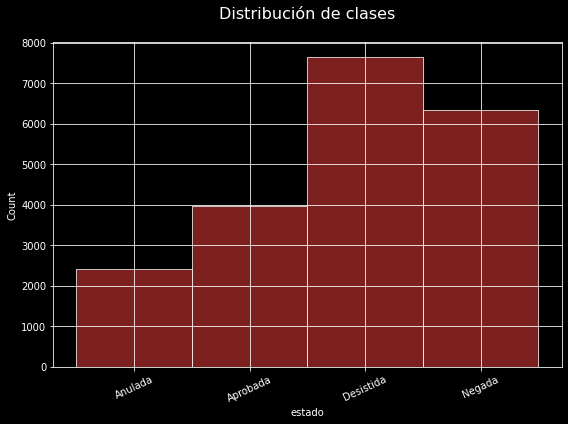

In [36]:
# Nueva distribución de clases sin outliers
get_estratified_classes(data=dataset, target='estado')

### **Separando el dataset**

In [37]:
# Separamos los conjuntos en train y test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, dataset[['estado']], test_size=0.25, random_state=seed, stratify=dataset['estado'])
print(f'Train set: {X_train.shape} {y_train.shape}')
print(f'Test set: {X_test.shape} {y_test.shape}')

Train set: (15258, 25) (15258, 1)
Test set: (5086, 25) (5086, 1)


In [38]:
# Manipularemos las variables discretas como si fueran categóricas
X_train[discretes] = X_train[discretes].astype('category')
X_test[discretes] = X_test[discretes].astype('category')

### **Ingeniería de variables**

In [39]:
# Pipeline
from sklearn.pipeline import Pipeline
from feature_engine.imputation import CategoricalImputer
from feature_engine.encoding import RareLabelEncoder
from feature_engine.encoding import CountFrequencyEncoder
from feature_engine.discretisation import EqualFrequencyDiscretiser

pipe = Pipeline([
    # Imputación de datos faltantes
    ('imputer_missing_categoricals_less_than_5perc', CategoricalImputer(imputation_method = 'missing', variables = categoricals_less_than_5perc)),

    # Codificación de variables categóricas y discretas
    ('rare_label_enc_cat_high_cardinality', RareLabelEncoder(tol = 0.05,
                         n_categories = 6, variables = categoricals_high_cardinality)),
    
    ('rare_label_enc_cat_low_cardinality', RareLabelEncoder(tol = 0.05,
                         n_categories = 7, variables = categoricals_low_cardinality)),
    
    ('rare_label_enc_disc_high_cardinality', RareLabelEncoder(tol = 0.05,
                         n_categories = 8, variables = discretes_high_cardinality)),

    ('encoder_categoricals', CountFrequencyEncoder(encoding_method = 'frequency', variables = categoricals + discretes)),
    
    # Discretiazación de variables continuas
    ('discretizer', EqualFrequencyDiscretiser(q = 10, variables = continuous)),
])

In [40]:
# 1. Ajustemos el Pipeline con los datos de entrenamiento
pipe.fit(X_train, y_train)

# 2. Hacemos una transformación: trasladando los cambios del train al conjunto de test
X_train = pipe.transform(X_train)
X_test = pipe.transform(X_test)

# 3. Reseteamos los índices
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

# 4. Observamos las dimensiones
print(X_train.shape, X_test.shape)

(15258, 25) (5086, 25)


### **Importancia entre predictores**

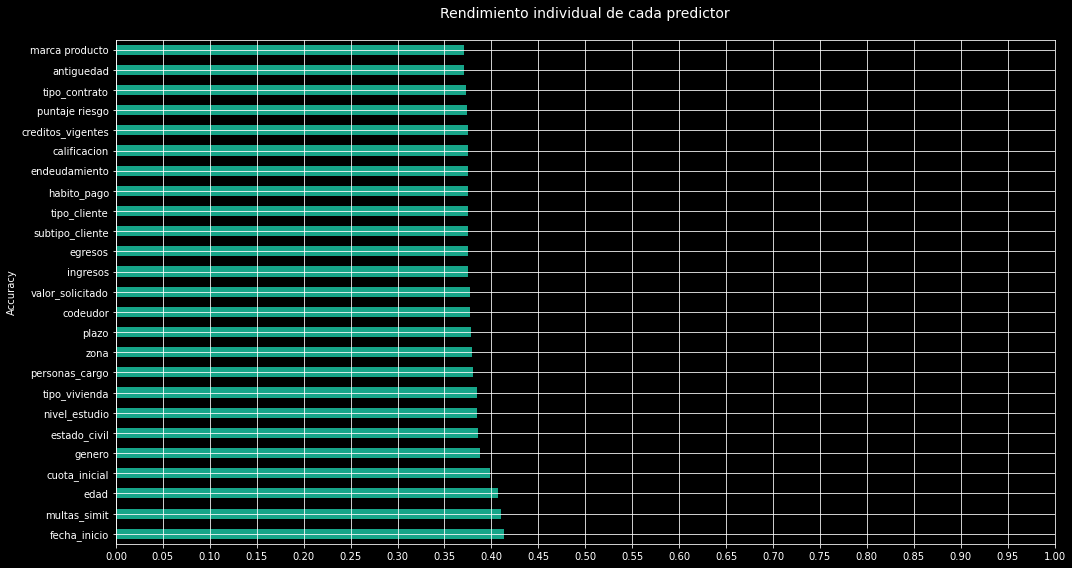

In [41]:
# Features importance
from feature_engine.selection import SelectBySingleFeaturePerformance
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10, max_depth=2, random_state=seed, n_jobs=-1)

# Seteamos el selector de predictores
sel = SelectBySingleFeaturePerformance(
    variables=None,
    estimator=rf,
    scoring='accuracy',
    cv=5,
    threshold=0.5)

# Ajustamos con los datos de train
sel.fit(X_train, y_train)

# Plotteamos con el Accuracy
plt.style.use('dark_background')
pd.Series(sel.feature_performance_).sort_values(ascending=False).plot.barh(figsize=(15, 8), color='#17A589')
plt.title('Rendimiento individual de cada predictor\n', fontsize=14)
plt.ylabel('Accuracy')
plt.xticks(np.arange(0, 1.01, 0.05))
plt.yticks(range(X_train.shape[1]), labels=X_train.columns)
plt.grid()
plt.tight_layout()

### **Creación del modelo**

In [42]:
from sklearn.ensemble import HistGradientBoostingClassifier

# Modelo instanciado
model = HistGradientBoostingClassifier(loss='categorical_crossentropy', random_state=seed)

# Ajustamos
model.fit(X_train[sel.feature_names_in_[0:15]], y_train)

# Predicciones
train_preds = model.predict(X_train[sel.feature_names_in_[0:15]])
train_preds[:10]

array(['Anulada', 'Desistida', 'Negada', 'Negada', 'Aprobada', 'Negada',
       'Negada', 'Aprobada', 'Negada', 'Desistida'], dtype=object)

### **Ajuste y predicción**

In [43]:
# Modelo instanciado
model2 = HistGradientBoostingClassifier(loss='categorical_crossentropy', random_state=seed)

# Ajustamos
model2.fit(X_test[sel.feature_names_in_[0:15]], y_test)

# Predicciones
test_preds = model2.predict(X_test[sel.feature_names_in_[0:15]])
test_preds[:10]

array(['Negada', 'Desistida', 'Desistida', 'Desistida', 'Negada',
       'Desistida', 'Anulada', 'Desistida', 'Negada', 'Desistida'],
      dtype=object)

### **Evaluación**

In [44]:
# Evaluamos el modelo
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

# K-Folds
rkfold = RepeatedKFold(n_splits=10, n_repeats=3, random_state=seed)

# Función para hallar la validación cruzada
def cross_validation(model, X, y, scoring:str, display_name:str):
    
    cv_results = cross_val_score(model, X, y, cv=rkfold, scoring=scoring, n_jobs=-1)
    print(f'{display_name}: {np.mean(cv_results)*100:0.2f}% | {display_name} Std: {np.std(cv_results)*100:0.2f}%')


# Validación cruzada train y test
cross_validation(model, X=X_train, y=y_train, scoring='accuracy', display_name='Accuracy')
cross_validation(model2, X=X_test, y=y_test, scoring='accuracy', display_name='Accuracy')

Accuracy: 50.48% | Accuracy Std: 1.05%
Accuracy: 49.28% | Accuracy Std: 2.25%


In [45]:
# Performance del modelo de train
from sklearn.metrics import accuracy_score
print('Métricas sobre el train set')
print(f'Accuracy Score: {accuracy_score(y_train, train_preds)*100:0.2f}%\n')

# Performance del modelo de test
print('Métricas sobre el test set')
print(f'Accuracy Score: {accuracy_score(y_test, test_preds)*100:0.2f}%\n')

# Comparando los resultados
print(f'Número total de etiquetas: {X_test.shape[0]}')
print(f'Número total de etiquetas mal predecidas: {(y_test.squeeze() != test_preds).sum()}')
print(f'Número total de etiquetas bien predecidas: {X_test.shape[0] - (y_test.squeeze() != test_preds).sum()}')

Métricas sobre el train set
Accuracy Score: 55.21%

Métricas sobre el test set
Accuracy Score: 85.78%

Número total de etiquetas: 5086
Número total de etiquetas mal predecidas: 723
Número total de etiquetas bien predecidas: 4363


* ##### Como podemos observar en este punto en el modelo cae en **overfitting**, ya que la métrica de `accuracy` en los datos de **train** diverge mucho con respecto a los de **test**, lo cual genera incertidumbre con respecto a los resultados al encontrarse en un entorno de producción.

In [46]:
# Reporte de clasificación
from sklearn.metrics import classification_report

print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

     Anulada       0.92      0.74      0.82       601
    Aprobada       0.84      0.82      0.83       989
   Desistida       0.84      0.89      0.87      1909
      Negada       0.86      0.89      0.88      1587

    accuracy                           0.86      5086
   macro avg       0.87      0.83      0.85      5086
weighted avg       0.86      0.86      0.86      5086



In [47]:
# Concatenamos los resultados en un Dataframe
prediccion = pd.DataFrame(test_preds, columns=['Prediction'])
resultados = pd.concat((y_test, prediccion), axis=1)

# Exportamos los resultados a un csv
resultados.to_csv(r'resultados.csv', index=False, encoding='utf-8')